In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
IMAGE_SIZE = 64

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

C:\Users\12039\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [19]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
try:
    API_KEY = os.environ["REBRICKABLE_API_KEY"]
except:
    print('Please add your Rebrickable API Key to the project as instructed in the README.')

In [40]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import cv2
import tqdm
import requests as r

class CustomImageDataset(Dataset):
    def __init__(self, dataset_path):

        # Init output data
        x_data = []
        y_data = []
        
        # For each class folder
        for label in os.listdir(dataset_path)[:50]:

            # Initialize variables to retrieve and store images
            curr_path = dataset_path + "/" + label

            # For each image
            for filename in tqdm.tqdm(os.listdir(curr_path)):

                # Store image in tensor representation
                image_path = curr_path + "/" + filename
                image_file = cv2.imread(image_path)
                image_tensor = cv2.resize(image_file, (IMAGE_SIZE, IMAGE_SIZE))
                assert(image_tensor.shape == (IMAGE_SIZE, IMAGE_SIZE, 3))

                # Add tensor to data dictionary
                x_data.append(image_tensor.astype('float32') / 255.0)
                y_data.append(label)

        self.x_data = x_data
        self.y_data = y_data
        self.labels = set(y_data)

        rebrickable_query = 'https://rebrickable.com/api/v3/lego/parts/?key=' + API_KEY + '&part_nums='
        for label in self.labels:
            rebrickable_query += label + ','
        print(rebrickable_query)

        self.brick_info = {}
        response = r.get(rebrickable_query).json()
        for entry in response['results']:
            self.brick_info[entry['part_num']] = entry

        self.brick_info = pd.DataFrame(self.brick_info).T

    def __len__(self):
        assert len(self.x_data) == len(self.y_data)
        return len(self.x_data)

    def __getitem__(self, idx):
        return (self.x_data[idx], self.y_data[idx])

100%|██████████| 4000/4000 [00:02<00:00, 1780.98it/s]


https://rebrickable.com/api/v3/lego/parts/?key=0cd19f164c9979cfe1af23c2b4cf3c85&part_nums=15100,22388,22885,2431,2540,26603,15070,2429,2780,20482,18677,11212,11477,10247,2430,18651,2654,15535,18674,2357,18654,26601,14719,15379,24866,11458,2450,25269,11214,2436,24246,14704,2445,26047,2454,27925,14769,11476,15712,24201,11090,15068,2432,15392,15573,2420,26604,2456,11211,2412b,


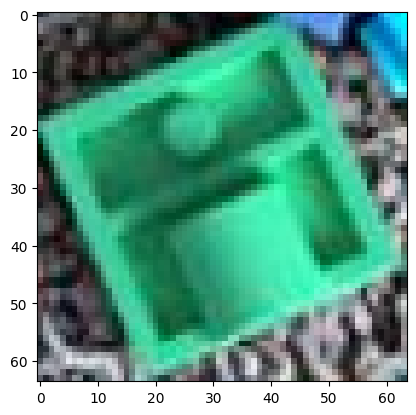

In [41]:
dataset = CustomImageDataset('dataset')
# debugging
plt.imshow(dataset.x_data[100])
plt.show()

11212


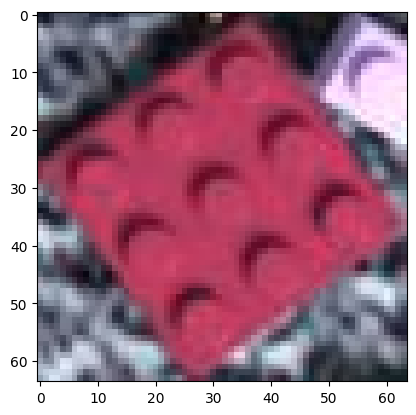

In [42]:
plt.imshow(dataset.x_data[12001])
print(dataset.y_data[12001])
plt.show()

In [43]:
dataset.labels

{'10247',
 '11090',
 '11211',
 '11212',
 '11214',
 '11458',
 '11476',
 '11477',
 '14704',
 '14719',
 '14769',
 '15068',
 '15070',
 '15100',
 '15379',
 '15392',
 '15535',
 '15573',
 '15712',
 '18651',
 '18654',
 '18674',
 '18677',
 '20482',
 '22388',
 '22885',
 '2357',
 '2412b',
 '2420',
 '24201',
 '24246',
 '2429',
 '2430',
 '2431',
 '2432',
 '2436',
 '2445',
 '2450',
 '2454',
 '2456',
 '24866',
 '25269',
 '2540',
 '26047',
 '2654',
 '26601',
 '26603',
 '26604',
 '2780',
 '27925'}

In [44]:
dataset.brick_info

,part_num,name,part_cat_id,part_url,part_img_url,external_ids,print_of
10247,10247,Plate Special 2 x 2 with 1 Pin Hole [Complete ...,9,https://rebrickable.com/parts/10247/plate-spec...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['10247'], 'BrickOwl': ['268558'...",None
11090,11090,Bar Holder with Clip,32,https://rebrickable.com/parts/11090/bar-holder...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11090'], 'BrickOwl': ['112838'...",None
11211,11211,Brick Special 1 x 2 with 2 Studs on 1 Side,5,https://rebrickable.com/parts/11211/brick-spec...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11211'], 'BrickOwl': ['929279'...",None
11212,11212,Plate 3 x 3,14,https://rebrickable.com/parts/11212/plate-3-x-3/,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11212'], 'BrickOwl': ['855115'...",None
11214,11214,Technic Axle Pin 3L with Friction Ridges Lengt...,53,https://rebrickable.com/parts/11214/technic-ax...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11214'], 'BrickOwl': ['102238'...",None
11458,11458,Plate Special 1 x 2 with Pin Hole on Top,9,https://rebrickable.com/parts/11458/plate-spec...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11458'], 'BrickOwl': ['556430'...",None
11476,11476,Plate Special 1 x 2 with Clip Horizontal on Side,9,https://rebrickable.com/parts/11476/plate-spec...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11476'], 'BrickOwl': ['871946'...",None
11477,11477,Slope Curved 2 x 1 No Studs [1/2 Bow],37,https://rebrickable.com/parts/11477/slope-curv...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['11477'], 'BrickOwl': ['910030'...",None
14704,14704,Plate Special 1 x 2 5.9mm Centre Side Cup,9,https://rebrickable.com/parts/14704/plate-spec...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['14704'], 'BrickOwl': ['70567']...",None
14719,14719,Tile 2 x 2 Corner,19,https://rebrickable.com/parts/14719/tile-2-x-2...,https://cdn.rebrickable.com/media/parts/elemen...,"{'BrickLink': ['14719'], 'BrickOwl': ['332970'...",None
